In [1]:
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
import pickle
import warnings
warnings.filterwarnings('ignore')

# For text processing

In [3]:
# Install required packages
!pip install langdetect
!pip install nltk
!pip install sbnltk
!pip install textblob
!pip install imblearn
from langdetect import detect
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=fa9a47ac2772ca0ab735dcd3b7447aa91d40c22b4d16a908e0a94830f66d8b56
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7

# For ML models

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For handling imbalanced data

In [5]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline

# Install required packages

In [8]:
!pip install langdetect nltk sbnltk textblob imblearn nlpaug

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 14.5 MB/s eta 0:00:00


True

# For data augmentation

In [9]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas

print("✅ Packages loaded successfully")

✅ Packages loaded successfully


# Mount Google Drive if using Colab

In [10]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    dataset_path = '/content/drive/MyDrive/TechTalentAssignment/Data & Topics.xlsx'
except:
    dataset_path = 'Data & Topics.xlsx'  # Change this to your local path if not using Colab

Mounted at /content/drive


# Load data

In [11]:
print("📊 Loading dataset...")
df = pd.read_excel(dataset_path)
df.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {df.shape}")

📊 Loading dataset...
Dataset shape after removing duplicates: (551, 3)


# Define emoji pattern for removal

In [12]:
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # Emoticons
    u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    u"\U0001F680-\U0001F6FF"  # Transport & Map
    u"\U0001F1E0-\U0001F1FF"  # Flags
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U0001F900-\U0001F9FF"  # Supplemental symbols
    u"\U0001FA70-\U0001FAFF"  # Extended-A
    u"\U00002600-\U000026FF"  # Misc symbols
    u"\U0001F000-\U0001F02F"  # Mahjong
    u"\U0000203C"             # Double exclamation
    u"\uFE0F"                 # Variation Selector-16
    "]+",
    flags=re.UNICODE
)

# Custom punctuation (Bangla, Urdu, Arabic)


In [18]:
custom_punct = '।॥''""…،؛؟'
all_punct = string.punctuation + custom_punct

custom_punct = '।॥''""…،؛؟'
all_punct = string.punctuation + custom_punct

# Load stopwords

In [13]:
en_stopwords = set(stopwords.words('english'))
bn_stopwords = set()
try:
    # Try to load Bengali stopwords if available
    bn_stopwords = set(stopwords.words('bengali'))
except:
    print("Bengali stopwords not available. Continuing without them.")

lemmatizer = WordNetLemmatizer()

# Detect Bengali characters
def is_bengali(word):
    return bool(re.search(r'[\u0980-\u09FF]', word))

# Basic text preprocessing

In [19]:
def preprocess_text(text):
    text = str(text).lower()

    # Remove URLs, hashtags, mentions
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"[@#](\w+)", r"\1", text)

    # Remove emojis
    text = emoji_pattern.sub('', text)

    # Remove punctuations
    text = re.sub(f"[{re.escape(all_punct)}]", "", text)

    # Normalize space
    text = re.sub(r'\s+', ' ', text).strip()

    try:
        lang = detect(text)
    except:
        lang = 'en'  # Default to English if detection fails

    # Tokenize words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize based on language
    clean_tokens = []
    for token in tokens:
        if token.isalpha():  # Keep only alphabetic tokens
            if is_bengali(token):
                if token not in bn_stopwords:
                    clean_tokens.append(token)
            else:
                if token not in en_stopwords:
                    clean_tokens.append(lemmatizer.lemmatize(token))

    return ' '.join(clean_tokens)

# ======== DATA AUGMENTATION TECHNIQUES ========

In [20]:
# 1. Synonym replacement
def get_synonyms(word):
    try:
        from nltk.corpus import wordnet
        synonyms = []
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                if lemma.name() != word and "_" not in lemma.name():
                    synonyms.append(lemma.name())
        return list(set(synonyms))
    except:
        return []

def synonym_replacement(text, n=1):
    words = text.split()
    if not words:
        return text

    # Filter words that are likely to have good synonyms (longer than 3 chars)
    candidates = [word for word in words if len(word) > 3]
    if not candidates:
        return text

    # Limit replacements to a reasonable number
    n = min(n, len(candidates), 5)

    # Randomly select words to replace
    random_words = random.sample(candidates, n) if n < len(candidates) else candidates

    # Replace with synonyms
    new_words = words.copy()
    for random_word in random_words:
        synonyms = get_synonyms(random_word)
        if synonyms:
            replacement = random.choice(synonyms)
            new_words = [replacement if word == random_word else word for word in new_words]

    return ' '.join(new_words)

# 2. Random insertion
def random_insertion(text, n=1):
    words = text.split()
    if not words:
        return text

    # Limit insertions to a reasonable number
    n = min(n, len(words), 5)

    new_words = words.copy()
    for _ in range(n):
        # Get a random synonym of a random word
        random_idx = random.randint(0, len(words)-1)
        random_word = words[random_idx]
        synonyms = get_synonyms(random_word)

        if synonyms:
            # Insert the synonym at a random position
            random_synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, random_synonym)

    return ' '.join(new_words)

# 3. Random swap
def random_swap(text, n=1):
    words = text.split()
    if len(words) < 2:
        return text

    # Limit swaps to a reasonable number
    n = min(n, len(words)//2, 5)

    new_words = words.copy()
    for _ in range(n):
        # Swap two random words
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]

    return ' '.join(new_words)

# 4. Random deletion
def random_deletion(text, p=0.1):
    words = text.split()
    if len(words) <= 3:
        return text

    # Keep some words based on probability (1-p)
    new_words = []
    for word in words:
        if random.random() > p or len(new_words) < 2:  # Ensure we keep at least 2 words
            new_words.append(word)

    if not new_words:  # If all words were deleted
        return random.choice(words)  # Return a single random word

    return ' '.join(new_words)

# 5. Back translation (simple simulation)
def back_translation_simulate(text):
    """Simulate back translation by introducing minor changes"""
    # In a real implementation, you'd use actual translation APIs
    words = text.split()
    if not words:
        return text

    # Introduce small changes to simulate translation effects
    changes = []
    for word in words:
        if len(word) > 3 and random.random() < 0.3:
            # Get synonyms
            synonyms = get_synonyms(word)
            if synonyms:
                changes.append(random.choice(synonyms))
            else:
                changes.append(word)
        else:
            changes.append(word)

    return ' '.join(changes)

# Combined augmentation function

In [21]:
def augment_text(text, augmentation_count=3):
    """Apply multiple augmentation techniques to generate new samples"""
    augmented_texts = []

    # Apply different augmentation techniques
    augmentation_funcs = [
        lambda t: synonym_replacement(t, n=1),
        lambda t: synonym_replacement(t, n=2),
        lambda t: random_insertion(t, n=1),
        lambda t: random_insertion(t, n=2),
        lambda t: random_swap(t, n=1),
        lambda t: random_deletion(t, p=0.1),
        lambda t: random_deletion(t, p=0.2),
        back_translation_simulate
    ]

    # Randomly select a subset of augmentation techniques
    selected_funcs = random.sample(augmentation_funcs,
                                  min(augmentation_count, len(augmentation_funcs)))

    for func in selected_funcs:
        augmented_text = func(text)
        if augmented_text != text:  # Only add if different from original
            augmented_texts.append(augmented_text)

    return augmented_texts

# ======== MAIN CODE ========

In [22]:
# Apply preprocessing to data
print("🔄 Applying text preprocessing...")
df['clean_context'] = df['Context'].apply(preprocess_text)

# Remove empty documents after cleaning
df = df[df['clean_context'].str.strip() != '']
print(f"Dataset shape after removing empty documents: {df.shape}")

🔄 Applying text preprocessing...
Dataset shape after removing empty documents: (530, 4)


# Check class distribution

In [23]:
X = df['clean_context']
y = df['Training Topic']

print("\n📊 Checking class distribution...")
class_counts = y.value_counts()
print(class_counts)


📊 Checking class distribution...
Training Topic
Mob Justice                   123
Law and Order                  62
Politics                       57
Islamic Fundamentalism         45
International affairs          34
Religion                       33
Corruption                     31
National Defence               25
Diplomacy                      24
Governance & Policy Reform     18
Women Rights                   17
Sports                         15
Election                       13
Terrorism                      10
Culture & Lifestyle             9
Trade & Commodity Price         6
Education                       3
Environment                     2
Natural Disaster                2
Religious Conflict              1
Name: count, dtype: int64


# Visualize class distribution

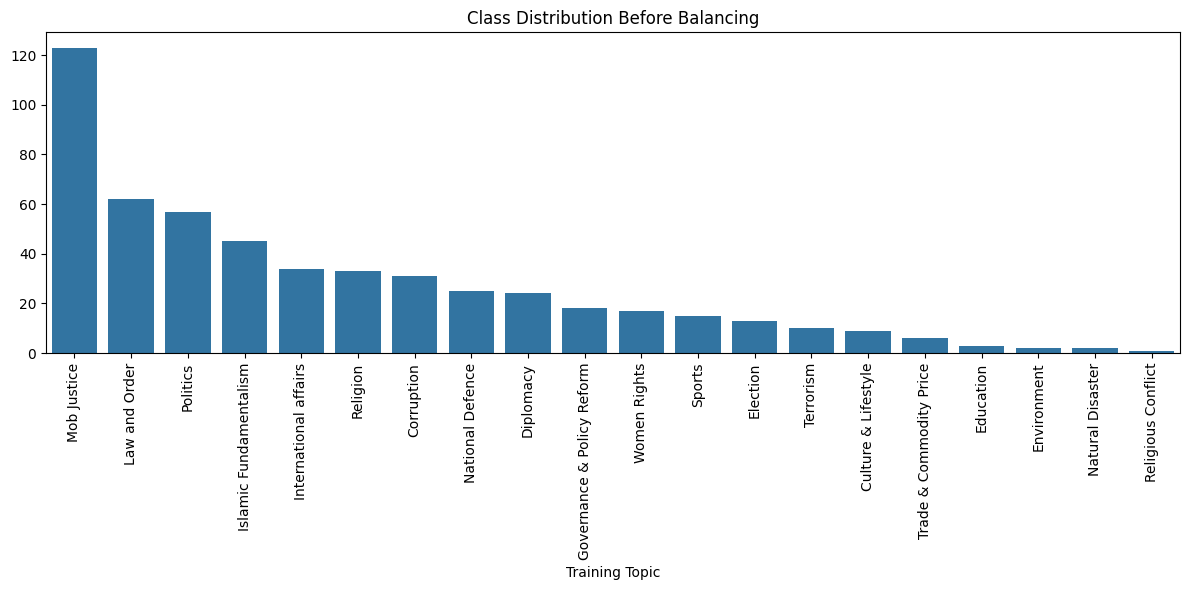

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution Before Balancing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Filter out classes with too few samples

In [25]:
print("\n🔍 Filtering classes with insufficient samples...")
min_samples_per_class = 10  # Minimum number of samples required per class
valid_classes = class_counts[class_counts >= min_samples_per_class].index
filtered_df = df[df['Training Topic'].isin(valid_classes)]
print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered_df)}")


🔍 Filtering classes with insufficient samples...
Original dataset size: 530
Filtered dataset size: 507


# Perform data augmentation for minority classes

In [26]:
print("\n✨ Performing data augmentation for minority classes...")
target_samples = 40  # Target number of samples for each class after augmentation

augmented_data = []
for class_name, count in class_counts.items():
    if class_name in valid_classes and count < target_samples:
        # Get all samples of this class
        class_samples = filtered_df[filtered_df['Training Topic'] == class_name]

        # Calculate how many augmented samples we need
        num_to_generate = min(target_samples - count, count * 5)  # Limit to 5x original size

        print(f"Augmenting class '{class_name}': {count} original -> {count + num_to_generate} total")

        # Generate augmented samples
        generated_count = 0
        while generated_count < num_to_generate:
            # Sample random text from this class
            sample_text = random.choice(class_samples['clean_context'].values)

            # Generate augmented versions
            augmented_texts = augment_text(sample_text,
                                        augmentation_count=min(5, num_to_generate-generated_count))

            # Add augmented samples to the dataset
            for aug_text in augmented_texts:
                if generated_count < num_to_generate:
                    augmented_data.append({
                        'Context': f"AUGMENTED: {aug_text}",
                        'Training Topic': class_name,
                        'clean_context': aug_text
                    })
                    generated_count += 1


✨ Performing data augmentation for minority classes...
Augmenting class 'International affairs': 34 original -> 40 total
Augmenting class 'Religion': 33 original -> 40 total
Augmenting class 'Corruption': 31 original -> 40 total
Augmenting class 'National Defence': 25 original -> 40 total
Augmenting class 'Diplomacy': 24 original -> 40 total
Augmenting class 'Governance & Policy Reform': 18 original -> 40 total
Augmenting class 'Women Rights': 17 original -> 40 total
Augmenting class 'Sports': 15 original -> 40 total
Augmenting class 'Election': 13 original -> 40 total
Augmenting class 'Terrorism': 10 original -> 40 total


# Add augmented data to the dataset

In [27]:
if augmented_data:
    augmented_df = pd.DataFrame(augmented_data)
    balanced_df = pd.concat([filtered_df, augmented_df], ignore_index=True)
    print(f"Dataset after augmentation: {balanced_df.shape}")
else:
    balanced_df = filtered_df
    print("No augmentation performed.")

Dataset after augmentation: (687, 4)


In [30]:
# Check new class distribution
new_class_counts = balanced_df['Training Topic'].value_counts()
print("\n📊 New class distribution after augmentation:")
print(new_class_counts)


📊 New class distribution after augmentation:
Training Topic
Mob Justice                   123
Law and Order                  62
Politics                       57
Islamic Fundamentalism         45
Election                       40
Corruption                     40
Governance & Policy Reform     40
International affairs          40
Diplomacy                      40
National Defence               40
Religion                       40
Terrorism                      40
Sports                         40
Women Rights                   40
Name: count, dtype: int64


# Visualize new class distribution

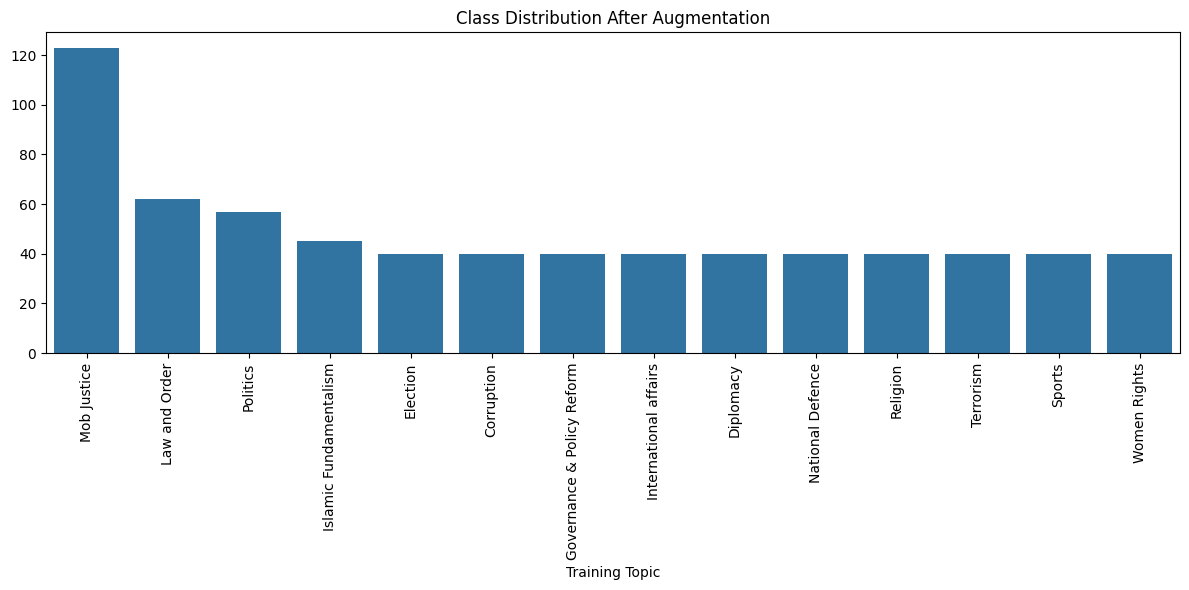

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=new_class_counts.index, y=new_class_counts.values)
plt.title('Class Distribution After Augmentation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Split the data into training and testing sets

In [33]:
print("\n🔄 Performing train-test split...")
X = balanced_df['clean_context']
y = balanced_df['Training Topic']



🔄 Performing train-test split...


# Use stratified sampling to maintain class distribution

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 549
Testing set size: 138


# Feature extraction with TF-IDF

In [35]:
print("\n🔍 Extracting features with TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(
    min_df=2,                # Minimum document frequency
    max_df=0.9,              # Maximum document frequency
    ngram_range=(1, 2),      # Use unigrams and bigrams
    max_features=5000,       # Limit features to 5000
    sublinear_tf=True        # Apply sublinear tf scaling (log scaling)
)


🔍 Extracting features with TF-IDF...


# Fit on train text, transform both train and test

In [36]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF features shape: {X_train_tfidf.shape}")

TF-IDF features shape: (549, 1789)


# ======== MODEL TRAINING AND COMPARISON ========

# Define models to compare

In [37]:
models = {
    'MultinomialNB': MultinomialNB(alpha=0.5),
    'BernoulliNB': BernoulliNB(alpha=0.5),
    'LogisticRegression': LogisticRegression(C=1.0, max_iter=1000, solver='liblinear', multi_class='ovr'),
    'LinearSVC': LinearSVC(C=1.0, max_iter=2000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train models and compare


🧠 Training and evaluating models...
Training MultinomialNB...
MultinomialNB Accuracy: 0.6159
                            precision    recall  f1-score   support

                Corruption       1.00      0.12      0.22         8
                 Diplomacy       0.62      0.62      0.62         8
                  Election       0.56      0.62      0.59         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.60      0.38      0.46         8
    Islamic Fundamentalism       0.56      0.56      0.56         9
             Law and Order       0.43      0.23      0.30        13
               Mob Justice       0.47      0.92      0.62        25
          National Defence       0.86      0.75      0.80         8
                  Politics       0.33      0.27      0.30        11
                  Religion       1.00      0.25      0.40         8
                    Sports       0.89      1.00      0.94         8
                 Terr

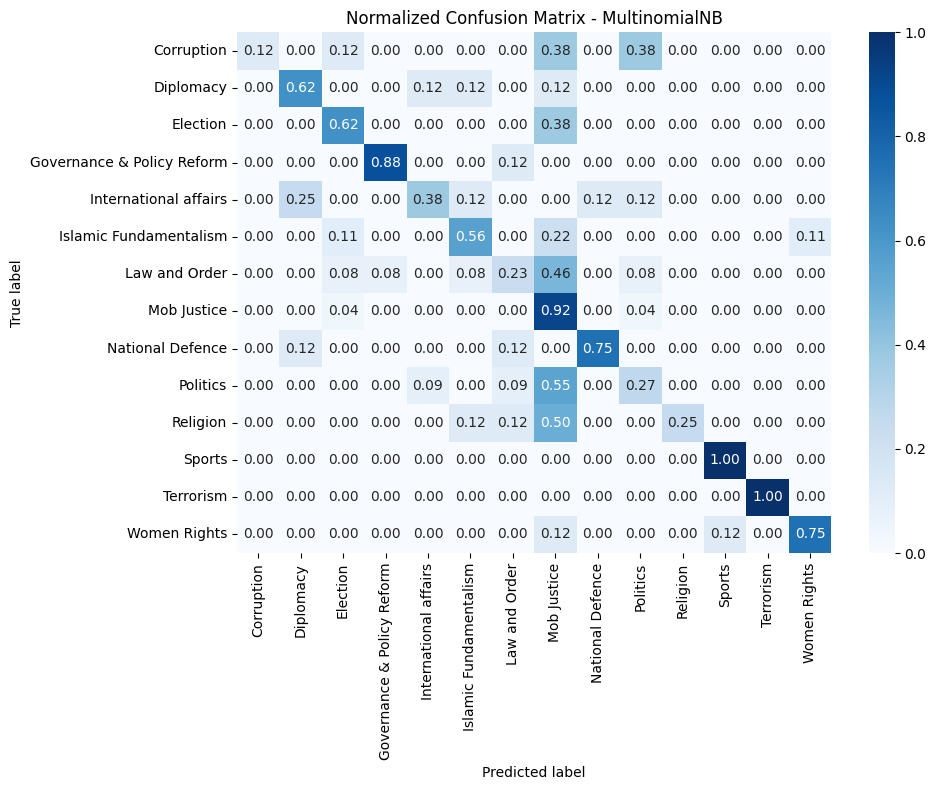

Training BernoulliNB...
BernoulliNB Accuracy: 0.4203
                            precision    recall  f1-score   support

                Corruption       0.00      0.00      0.00         8
                 Diplomacy       0.67      0.25      0.36         8
                  Election       1.00      0.25      0.40         8
Governance & Policy Reform       1.00      0.38      0.55         8
     International affairs       1.00      0.38      0.55         8
    Islamic Fundamentalism       0.50      0.11      0.18         9
             Law and Order       0.00      0.00      0.00        13
               Mob Justice       0.27      0.92      0.42        25
          National Defence       1.00      0.62      0.77         8
                  Politics       0.08      0.09      0.09        11
                  Religion       1.00      0.12      0.22         8
                    Sports       1.00      0.75      0.86         8
                 Terrorism       1.00      1.00      1.00     

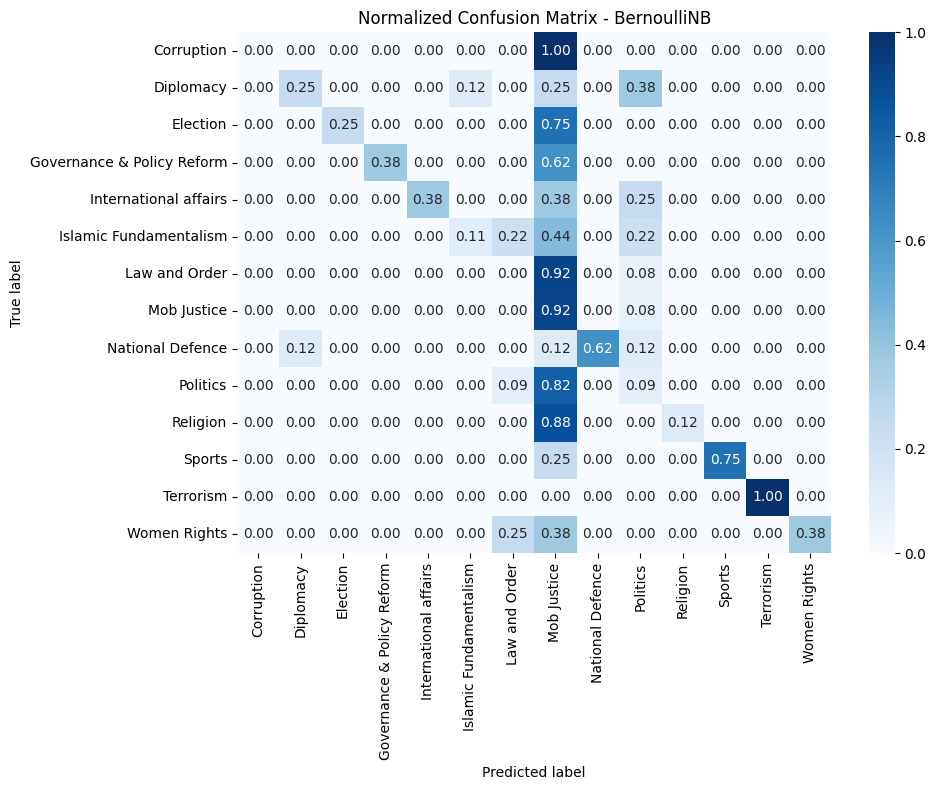

Training LogisticRegression...
LogisticRegression Accuracy: 0.6522
                            precision    recall  f1-score   support

                Corruption       1.00      0.12      0.22         8
                 Diplomacy       0.55      0.75      0.63         8
                  Election       0.83      0.62      0.71         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.67      0.50      0.57         8
    Islamic Fundamentalism       0.55      0.67      0.60         9
             Law and Order       0.36      0.38      0.37        13
               Mob Justice       0.59      0.88      0.71        25
          National Defence       1.00      0.75      0.86         8
                  Politics       0.25      0.27      0.26        11
                  Religion       1.00      0.38      0.55         8
                    Sports       0.89      1.00      0.94         8
                 Terrorism       1.00      1.00 

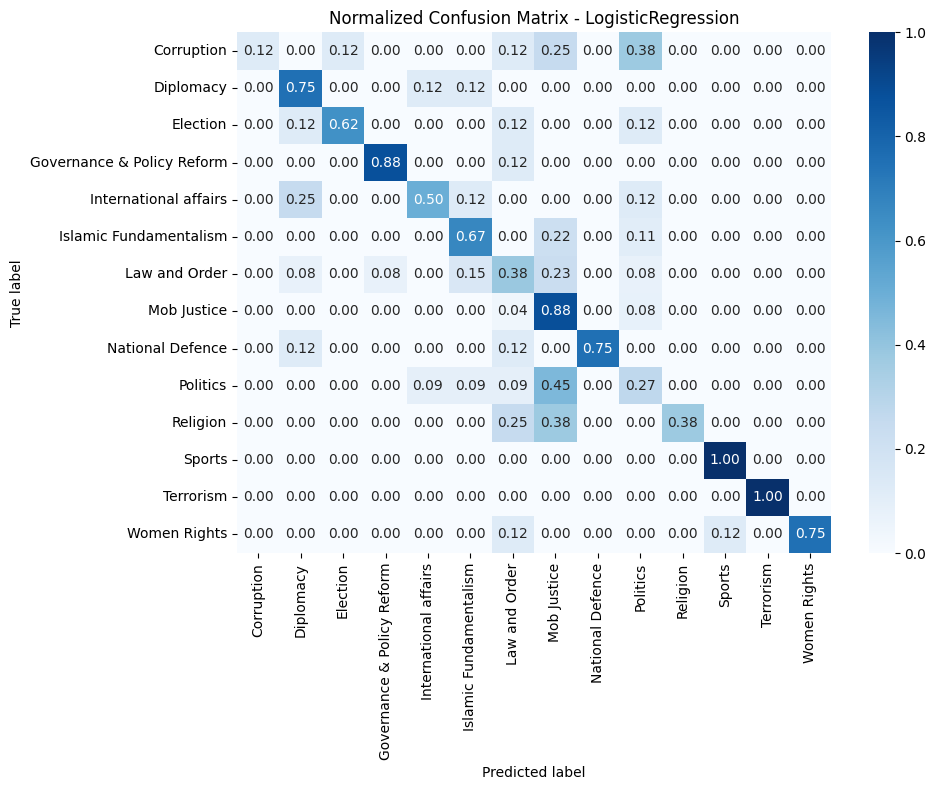

Training LinearSVC...
LinearSVC Accuracy: 0.6087
                            precision    recall  f1-score   support

                Corruption       0.50      0.12      0.20         8
                 Diplomacy       0.46      0.75      0.57         8
                  Election       0.86      0.75      0.80         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.57      0.50      0.53         8
    Islamic Fundamentalism       0.50      0.56      0.53         9
             Law and Order       0.25      0.15      0.19        13
               Mob Justice       0.57      0.80      0.67        25
          National Defence       0.50      0.75      0.60         8
                  Politics       0.17      0.09      0.12        11
                  Religion       0.75      0.38      0.50         8
                    Sports       0.80      1.00      0.89         8
                 Terrorism       1.00      1.00      1.00         

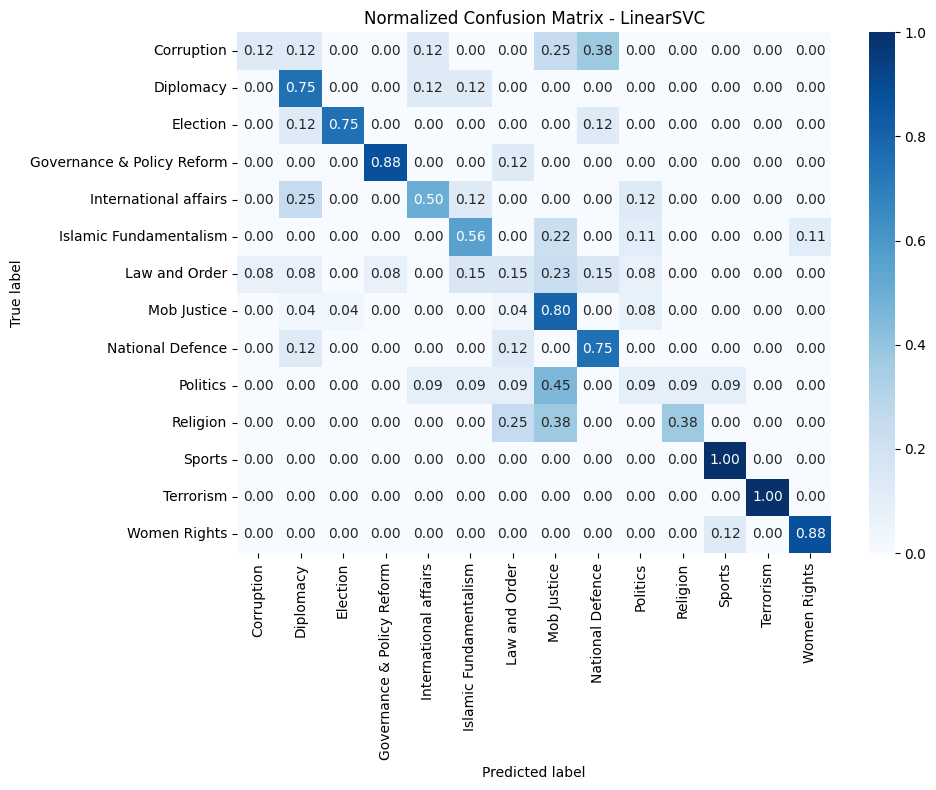

Training RandomForest...
RandomForest Accuracy: 0.6594
                            precision    recall  f1-score   support

                Corruption       0.67      0.50      0.57         8
                 Diplomacy       0.43      0.75      0.55         8
                  Election       0.86      0.75      0.80         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.62      0.62      0.62         8
    Islamic Fundamentalism       0.60      0.67      0.63         9
             Law and Order       0.40      0.15      0.22        13
               Mob Justice       0.66      0.84      0.74        25
          National Defence       0.56      0.62      0.59         8
                  Politics       0.33      0.18      0.24        11
                  Religion       0.44      0.50      0.47         8
                    Sports       0.89      1.00      0.94         8
                 Terrorism       1.00      1.00      1.00   

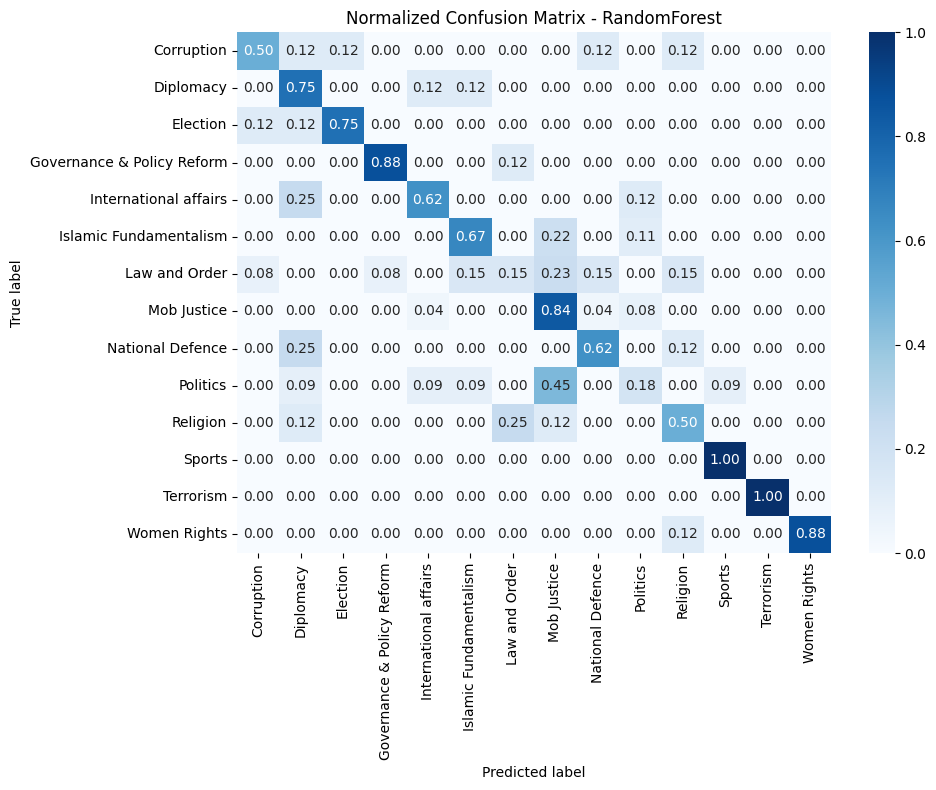

In [38]:
results = {}
print("\n🧠 Training and evaluating models...")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'model': model
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Normalized Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Compare model accuracies

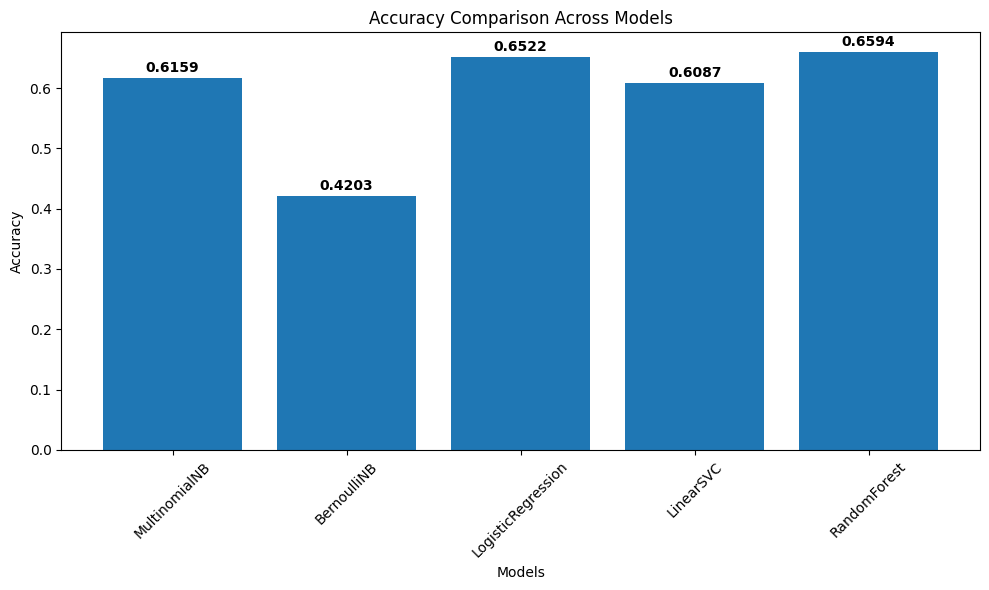

In [39]:
accuracies = [results[name]['accuracy'] for name in models.keys()]

plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Models')
plt.xticks(rotation=45)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ======== GRID SEARCH FOR BEST MODEL ========

# Get the best model from results

In [40]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\n🏆 Best model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")



🏆 Best model: RandomForest with accuracy 0.6594


# Hyperparameter tuning for the best model

In [41]:
print("\n🔍 Performing hyperparameter tuning for the best model...")

if best_model_name == 'MultinomialNB':
    param_grid = {
        'alpha': [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0],
        'fit_prior': [True, False]
    }
    base_model = MultinomialNB()
elif best_model_name == 'BernoulliNB':
    param_grid = {
        'alpha': [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0],
        'fit_prior': [True, False]
    }
    base_model = BernoulliNB()
elif best_model_name == 'LogisticRegression':
    param_grid = {
        'C': [0.1, 0.5, 1.0, 5.0, 10.0],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }
    base_model = LogisticRegression(max_iter=1000, multi_class='ovr')
elif best_model_name == 'LinearSVC':
    param_grid = {
        'C': [0.1, 0.5, 1.0, 5.0, 10.0],
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l1', 'l2'],
        'dual': [True, False]
    }
    base_model = LinearSVC(max_iter=2000)
else:  # RandomForest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=42)


🔍 Performing hyperparameter tuning for the best model...


# Use StratifiedKFold for consistent evaluation across imbalanced classes

In [42]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create grid search
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit grid search

In [43]:
grid_search.fit(X_train_tfidf, y_train)

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.6557


# Evaluate the tuned model on the test set

In [44]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
tuned_accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned model accuracy on test set: {tuned_accuracy:.4f}")
print(classification_report(y_test, y_pred))

Tuned model accuracy on test set: 0.6812
                            precision    recall  f1-score   support

                Corruption       0.71      0.62      0.67         8
                 Diplomacy       0.55      0.75      0.63         8
                  Election       0.86      0.75      0.80         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.67      0.50      0.57         8
    Islamic Fundamentalism       0.50      0.78      0.61         9
             Law and Order       0.40      0.15      0.22        13
               Mob Justice       0.60      0.84      0.70        25
          National Defence       0.64      0.88      0.74         8
                  Politics       0.43      0.27      0.33        11
                  Religion       1.00      0.50      0.67         8
                    Sports       0.89      1.00      0.94         8
                 Terrorism       1.00      1.00      1.00         8
      

# Plot confusion matrix for the tuned model

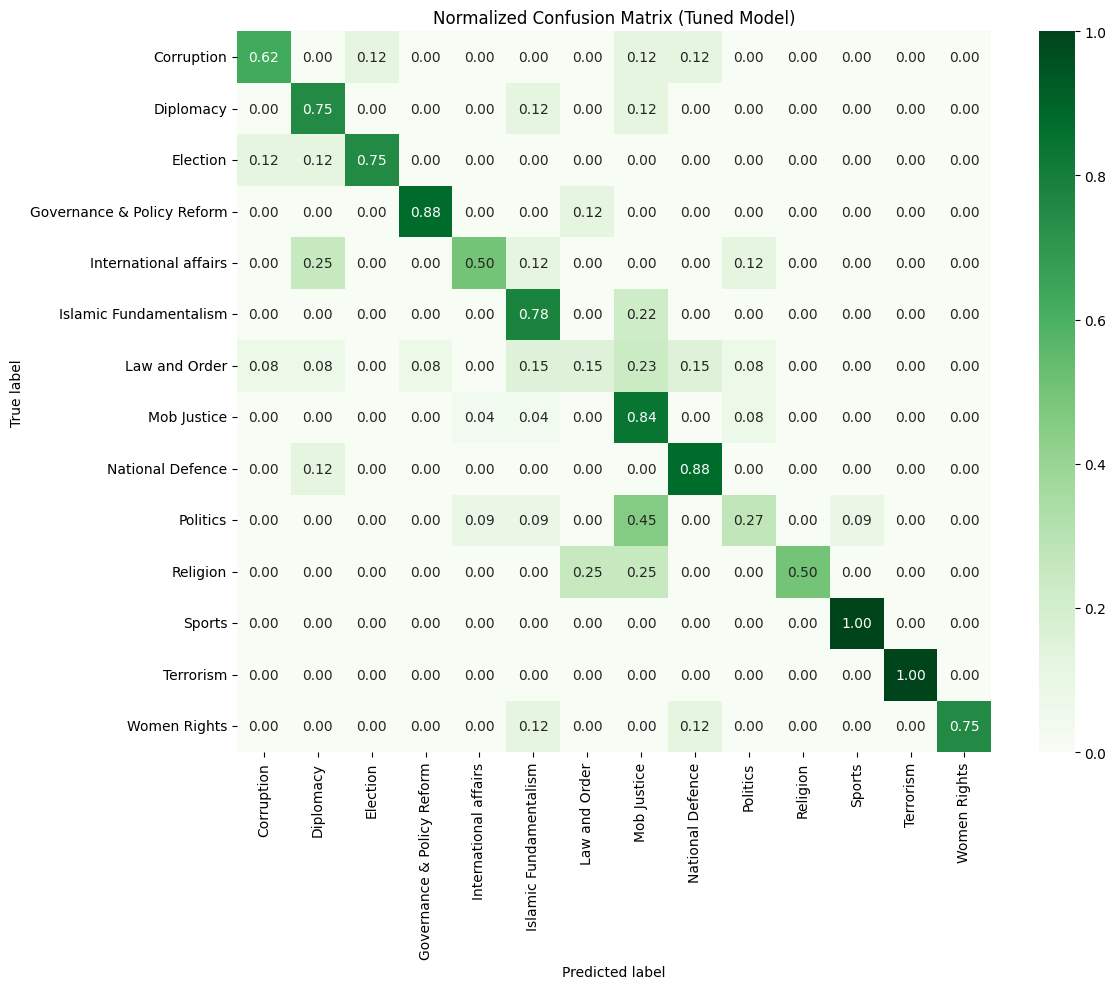

In [45]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Normalized Confusion Matrix (Tuned Model)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ======== ENSEMBLE MODEL ========

In [46]:
print("\n🔄 Creating ensemble model...")

# Select top-performing models for ensemble
top_models = {}
for name, result in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]:
    print(f"Using {name} in ensemble (Accuracy: {result['accuracy']:.4f})")
    top_models[name] = result['model']

# Create voting classifier
ensemble = VotingClassifier(
    estimators=[(name, model) for name, model in top_models.items()],
    voting='hard'  # Use 'soft' if all estimators support predict_proba
)


🔄 Creating ensemble model...
Using RandomForest in ensemble (Accuracy: 0.6594)
Using LogisticRegression in ensemble (Accuracy: 0.6522)
Using MultinomialNB in ensemble (Accuracy: 0.6159)


# Train ensemble

In [47]:
ensemble.fit(X_train_tfidf, y_train)

# Evaluate ensemble
y_pred_ensemble = ensemble.predict(X_test_tfidf)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble accuracy: {ensemble_accuracy:.4f}")
print(classification_report(y_test, y_pred_ensemble))

Ensemble accuracy: 0.6594
                            precision    recall  f1-score   support

                Corruption       0.33      0.12      0.18         8
                 Diplomacy       0.55      0.75      0.63         8
                  Election       0.86      0.75      0.80         8
Governance & Policy Reform       0.88      0.88      0.88         8
     International affairs       0.67      0.50      0.57         8
    Islamic Fundamentalism       0.55      0.67      0.60         9
             Law and Order       0.36      0.31      0.33        13
               Mob Justice       0.61      0.92      0.73        25
          National Defence       1.00      0.75      0.86         8
                  Politics       0.27      0.27      0.27        11
                  Religion       1.00      0.38      0.55         8
                    Sports       0.89      1.00      0.94         8
                 Terrorism       1.00      1.00      1.00         8
              Women R

# Plot confusion matrix for ensemble

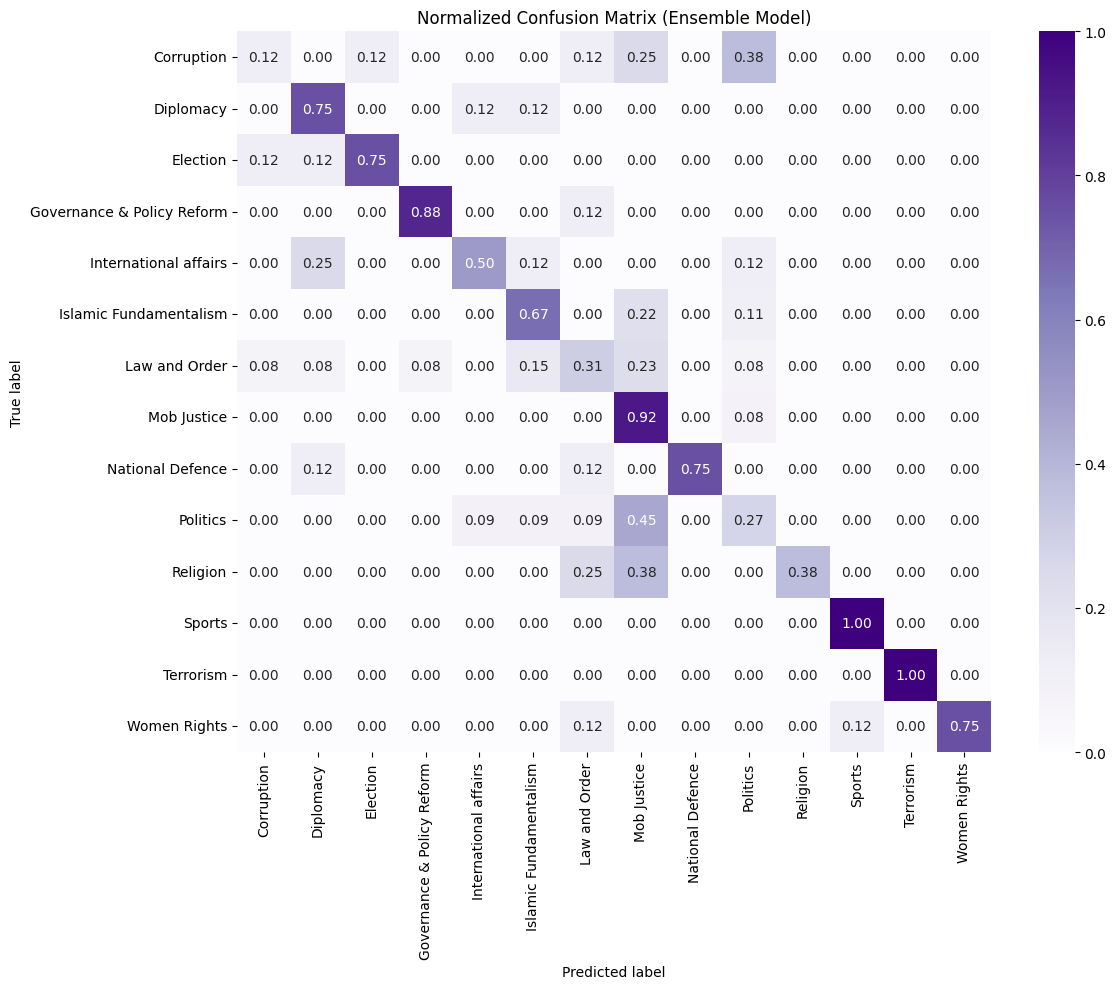

In [48]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_ensemble)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=ensemble.classes_, yticklabels=ensemble.classes_)
plt.title('Normalized Confusion Matrix (Ensemble Model)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ======== SAVE MODELS AND VECTORIZER ========

In [49]:
print("\n💾 Saving models and vectorizer...")

# Define file paths
models_to_save = {
    'best_tuned_model': best_model,
    'ensemble_model': ensemble,
    'tfidf_vectorizer': tfidf_vectorizer
}


💾 Saving models and vectorizer...


# Save models

In [50]:
for name, model_obj in models_to_save.items():
    try:
        # Try to save to Google Drive if available
        model_path = f'/content/drive/MyDrive/TechTalentAssignment/{name}.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump(model_obj, f)
        print(f"Saved {name} to Google Drive")
    except:
        # Fall back to local saving
        model_path = f'./{name}.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump(model_obj, f)
        print(f"Saved {name} locally")

Saved best_tuned_model to Google Drive
Saved ensemble_model to Google Drive
Saved tfidf_vectorizer to Google Drive


# ======== TESTING WITH CUSTOM INPUT ========

In [51]:
print("\n🧪 Testing with custom input...")

def predict_topic(text, vectorizer, model):
    # Preprocess the input text
    preprocessed_text = preprocess_text(text)

    # Transform using the fitted vectorizer
    text_vector = vectorizer.transform([preprocessed_text])

    # Make prediction
    prediction = model.predict(text_vector)

    return prediction[0]


🧪 Testing with custom input...


# Example usage

In [52]:
test_texts = [
    "I need help with my account login",
    "The system is very slow today",
    "How do I reset my password"
]

print("Testing with sample texts:")
for text in test_texts:
    prediction = predict_topic(text, tfidf_vectorizer, best_model)
    print(f"Text: '{text}'")
    print(f"Predicted topic: {prediction}")
    print()


Testing with sample texts:
Text: 'I need help with my account login'
Predicted topic: National Defence

Text: 'The system is very slow today'
Predicted topic: National Defence

Text: 'How do I reset my password'
Predicted topic: National Defence



# Create a simple function to take user input for testing

In [53]:
def interactive_prediction():
    print("\n📝 Enter text to predict its topic (or 'exit' to quit):")

    while True:
        user_input = input("\nText: ")
        if user_input.lower() == 'exit':
            break

        prediction = predict_topic(user_input, tfidf_vectorizer, best_model)

        # Get prediction probabilities if available
        try:
            probs = best_model.predict_proba(tfidf_vectorizer.transform([preprocess_text(user_input)]))[0]
            top_classes = best_model.classes_[np.argsort(-probs)[:3]]
            top_probs = sorted(probs, reverse=True)[:3]

            print(f"Predicted topic: {prediction}")
            print("Top 3 predictions:")
            for cls, prob in zip(top_classes, top_probs):
                print(f"  - {cls}: {prob:.4f}")
        except:
            print(f"Predicted topic: {prediction}")

# Run interactive prediction if this is the main script

In [54]:
if __name__ == "__main__":
    interactive_prediction()

print("\n✅ Text classification pipeline completed successfully!")


📝 Enter text to predict its topic (or 'exit' to quit):

Text: আলোচিত গাড়িচালক আবেদ আলী এবং তার পরিবারের সন্দেহজনক লেনদেনের তথ্য পেয়েছে দুদক.
Predicted topic: National Defence
Top 3 predictions:
  - National Defence: 0.2658
  - Religion: 0.2278
  - Mob Justice: 0.1004

Text: মহান ফরজ বিধান জি*হাদকে যেন আমরা ভুলে না যাই। চেতনাকে উজ্জীবিত করার লক্ষ্যে,গাজ*ওয়া*তুল হিন্দের প্রস্তুতি স্বরূপ সহপাঠীদের সঙ্গে একটু আনন্দ। ভারত জেনে রাখুক: যে জাতি বন্ধুকের আগায় জান্নাত দেখে সে জাতিকে কখনো হারানো যায় না। একেকটা মুসলিম শিশু জন্মই নেয় শাহাদাতের জন্য। গোটা মুসলিম উম্মাহ জি*হাদ*কে আঁকড়ে ধরতে পারলে বিজয় সুনিশ্চিত #khilafah #shoriyah #savemuslims
Predicted topic: Religion
Top 3 predictions:
  - Religion: 0.6278
  - International affairs: 0.1183
  - Corruption: 0.0732

Text: অর্বাচীনের দোষ ক্ষমা করবেন,  তবে গুরূকুল শিক্ষা ব্যবস্থা সম্পর্কে আমার সামান্য কিছু কথা শুনবেন অনুগ্রহ করে। জয় শ্রী রাম 🙏🚩 জয় শ্রী রাম 🙏✊🚩                                            #HindusNews #SaveBangladeshiHindus #SaveBang

KeyboardInterrupt: Interrupted by user